In [1]:
import pandas as pd

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

In [2]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [4]:
train_set = train_set.dropna(thresh=700, axis=1)
test_set = test_set.dropna(thresh=700, axis=1)

In [5]:
corr_matrix = train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000219ADB77080>,
      dtype=object)

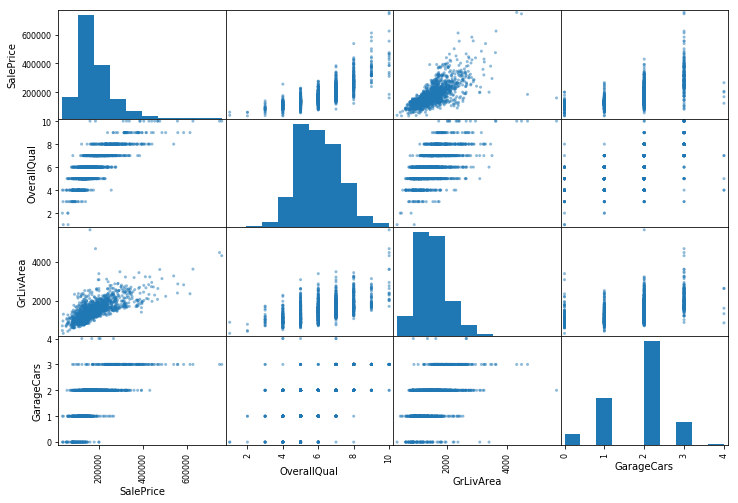

In [6]:
%matplotlib inline

from pandas.plotting import scatter_matrix

attributes = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars']
scatter_matrix(train_set[attributes], figsize=(12,8))

In [7]:
test_Id = test_set.Id

train_set = train_set.drop('Id', axis=1)
test_set = test_set.drop('Id', axis=1)

In [9]:
y_train = train_set.SalePrice

In [10]:
train_set = train_set.drop('SalePrice', axis=1)

In [11]:
train_set.shape, test_set.shape

((1460, 75), (1459, 75))

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehotencoder', OneHotEncoder()),
])

In [ ]:
from sklearn.compose import ColumnTransformer

num_values = train_set.loc[:, train_set.dtypes != 'object']
cat_values = train_set.loc[:, train_set.dtypes == 'object']

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_values),
        ("cat", cat_pipeline, cat_values),
    ])

train_set = full_pipeline.fit_transform(train_set)

In [ ]:
num_values = test_set.loc[:, test_set.dtypes != 'object']
cat_values = test_set.loc[:, test_set.dtypes == 'object']

In [17]:
train_set = pd.concat([num_train, cat_train], axis=1)
test_set = pd.concat([num_test, cat_test], axis=1)

In [18]:
[x for x in train_set.columns if x not in test_set.columns]

['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex']

In [19]:
train_set = train_set[test_set.columns]

In [20]:
train_set.shape, test_set.shape

((1460, 259), (1459, 259))

In [21]:
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

reg = XGBRegressor(learning_rate=0.01,
                         n_estimators=6000,
                         max_depth=4, min_child_weight=1,
                         gamma=0.6, subsample=0.7,
                         colsample_bytree=0.2,
                         objective='reg:linear', nthread=-1,
                         scale_pos_weight=1, seed=27,
                         reg_alpha=0.00006
                   )

reg.fit(train_set, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.2, gamma=0.6, learning_rate=0.01,
       max_delta_step=0, max_depth=4, min_child_weight=1, missing=None,
       n_estimators=6000, n_jobs=1, nthread=-1, objective='reg:linear',
       random_state=0, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.7)

In [22]:
feature_importances = reg.feature_importances_

sorted(zip(feature_importances, train_set.columns), reverse=True)

[(0.050924186, 'LotArea'),
 (0.048109476, 'BsmtUnfSF'),
 (0.045385562, 'GrLivArea'),
 (0.041533172, 'TotalBsmtSF'),
 (0.040897593, '1stFlrSF'),
 (0.036552306, 'LotFrontage'),
 (0.03609832, 'BsmtFinSF1'),
 (0.035903756, 'GarageArea'),
 (0.03132499, 'YearBuilt'),
 (0.028536221, 'MasVnrArea'),
 (0.025993904, 'GarageYrBlt'),
 (0.025189701, 'YearRemodAdd'),
 (0.024177963, 'OpenPorchSF'),
 (0.02312731, 'WoodDeckSF'),
 (0.022400934, '2ndFlrSF'),
 (0.020520138, 'MoSold'),
 (0.017484922, 'OverallQual'),
 (0.016330501, 'OverallCond'),
 (0.01438485, 'MSSubClass'),
 (0.013567676, 'TotRmsAbvGrd'),
 (0.011660938, 'YrSold'),
 (0.011284779, 'EnclosedPorch'),
 (0.009365069, 'BedroomAbvGr'),
 (0.008210649, 'ScreenPorch'),
 (0.008158765, 'GarageCars'),
 (0.0075620986, 'Fireplaces'),
 (0.0072248527, 'BsmtFullBath'),
 (0.0068097804, 'BsmtFinSF2'),
 (0.005201375, 'FullBath'),
 (0.0043452885, 'Neighborhood_StoneBr'),
 (0.004267462, 'SaleCondition_Normal'),
 (0.004137752, 'BsmtExposure_Gd'),
 (0.004008042, 'L

In [23]:
from sklearn.base import BaseEstimator, TransformerMixin

def indices_of_top_k(arr, k):
    return np.sort(np.argpartition(np.array(arr), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
    def fit(self, X, y=None):
        self.feature_indices_ = indices_of_top_k(self.feature_importances, self.k)
        return self
    def transform(self, X):
        return X.loc[:, self.feature_indices_]

In [24]:
k=5

In [25]:
import numpy as np

top_k_feature_indices = indices_of_top_k(feature_importances, k)
sorted(zip(feature_importances, attributes), reverse=True)[:k]

[(0.050924186, 'GrLivArea'),
 (0.036552306, 'OverallQual'),
 (0.017484922, 'GarageCars'),
 (0.01438485, 'SalePrice')]

In [26]:
feature_pipeline = Pipeline([
    ('feature_selection', TopFeatureSelector(feature_importances, k))
])

train_set = feature_pipeline.fit_transform(train_set)

KeyError: 'None of [[ 2 10 11 12 15]] are in the [columns]'

In [ ]:
reg.fit(train_set, y_train)

In [ ]:
submission = pd.DataFrame({
        "Id": test_Id,
        "SalePrice": reg.predict(test_set)
    })
submission.to_csv('submission.csv', index=False)

In [ ]:
submission.shape